<a href="https://colab.research.google.com/github/Sukantanath108/Data-Science-and-ML-journey/blob/main/FakeNews_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
dt_fake = pd.read_csv("Fake.csv")
dt_true = pd.read_csv("True.csv")

In [ ]:
dt_fake.head() #shows 1st 5 data form start
dt_true.tail() #shows last 5 data form end

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
dt_true["text"] = dt_true["text"].replace("(Reuters)","",regex=True)
dt_true.head()
# we replaced the reuters keyword form dataset as it will prevent from a good prediction
# the string () still remains in the text column

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


In [ ]:
dt_fake["class"] = 0
dt_true["class"] = 1

In [ ]:
dt_fake.shape,dt_true.shape

((23481, 5), (21417, 5))

In [ ]:
# lets remove last 20 data for manual testing
dt_fake_manual_testing = dt_fake.tail(20)
for i in range(23480,23460,-1):
    dt_fake.drop([i], axis = 0, inplace = True)

dt_true_manual_testing = dt_true.tail(20)
for i in range(21416,21396,-1):
    dt_true.drop([i], axis = 0 , inplace = True)

In [ ]:
dt_fake.shape,dt_true.shape

((23461, 5), (21397, 5))

In [ ]:
dt_fake_manual_testing.head(10)
dt_true_manual_testing.head(10)


,title,text,subject,date,class
21397,Germany's Schulz says he would demand U.S. wit...,BERLIN () - The leader of Germany s Social Dem...,worldnews,"August 23, 2017",1
21398,Blunt instrument? What a list of banned articl...,SHANGHAI () - An old review of an academic mon...,worldnews,"August 23, 2017",1
21399,Saudi police release teenager detained for dan...,DUBAI () - A 14-year-old boy who was detained ...,worldnews,"August 22, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON () - Abdul Daoud spilt most of the capp...,worldnews,"August 23, 2017",1
21401,"Argentina labor unions protest job losses, Mac...",BUENOS AIRES () - Argentina s main labor union...,worldnews,"August 22, 2017",1
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT () - The U.S...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON () - The United States suggested on...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON () - The United States has decided ...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD () - Outlining a new strategy for th...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA () - North Korea and the United States ...,worldnews,"August 22, 2017",1


In [ ]:
dt_merge = pd.concat([dt_fake,dt_true],axis=0)
dt_merge.head(10)
dt_merge.shape

(44858, 5)

In [ ]:
dt_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data = dt_merge.drop(['title', 'subject' , 'date'] , axis = 1)


In [ ]:
data.isnull().sum()

,0
text,0
class,0


In [ ]:
data = data.sample(frac = 1 ) # shuffling the data (mixing)
data.head()

,text,class
17147,BERLIN () - Germany will suspend its mission t...,1
12712,BRUSSELS () - The European Commission said on ...,1
11012,DETROIT () - Detroit Public Schools’ emergency...,1
21637,It s a shame really when a company who produce...,0
10360,WASHINGTON () - The United States hopes a new ...,1


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
data.head()

,text,class
0,BERLIN () - Germany will suspend its mission t...,1
1,BRUSSELS () - The European Commission said on ...,1
2,DETROIT () - Detroit Public Schools’ emergency...,1
3,It s a shame really when a company who produce...,0
4,WASHINGTON () - The United States hopes a new ...,1


In [ ]:
def wordsas(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

'''
     This will remove all the unnecessary special character,web links etc.
     You can integrate this function into your text preprocessing
     pipeline before vectorizing the text data. This will help in cleaning the
     text more effectively, leading to better model performance.

'''

'\n     This will remove all the unnecessary special character,web links etc.\n     You can integrate this function into your text preprocessing \n     pipeline before vectorizing the text data. This will help in cleaning the \n     text more effectively, leading to better model performance.\n\n'

In [ ]:
data['text'] = data['text'].apply(wordsas)
x = data['text']
y = data['class']

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(x,y,test_size = 0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31400,), (13458,), (31400,), (13458,))

In [ ]:
# now we will convert text to vector

from sklearn.feature_extraction.text import TfidfVectorizer
vt = TfidfVectorizer()
xv_train = vt.fit_transform(X_train)
xv_test = vt.transform(X_test)

**Testing with algorithms**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
score1 = LR.score(xv_test,y_test)
print(f"The accuracy of Logistic Regression model is {score1:.5f}")
print("The classification report is :\n",classification_report(y_test,LR.predict(xv_test)))

The accuracy of Logistic Regression model is 0.98150
The classification report is :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7016
           1       0.98      0.98      0.98      6442

    accuracy                           0.98     13458
   macro avg       0.98      0.98      0.98     13458
weighted avg       0.98      0.98      0.98     13458



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT.predict(xv_test)

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
score2 = DT.score(xv_test,y_test)
print(f"The accuracy of Decision Tree model is {score2:.5f}")
print("The classification report is :\n",classification_report(y_test,DT.predict(xv_test)))

The accuracy of Decision Tree model is 0.95244
The classification report is :
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      7016
           1       0.96      0.94      0.95      6442

    accuracy                           0.95     13458
   macro avg       0.95      0.95      0.95     13458
weighted avg       0.95      0.95      0.95     13458



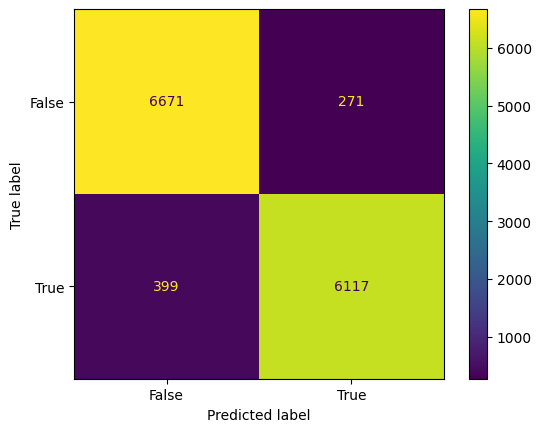

In [ ]:
# building the confusion matrix from DTC

from sklearn import metrics
conf = metrics.confusion_matrix(y_test,DT.predict(xv_test))
conf_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf,
                                            display_labels=[False, True])
conf_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
score3 = GB.score(xv_test,y_test)
print(f"The accuracy of Gradiant boosting(XGboost) is {score3:.5f}")
print("The classification report is :\n",classification_report(y_test,GB.predict(xv_test)))
#

The accuracy of Gradiant boosting(XGboost) is 0.96790
The classification report is :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      7016
           1       0.96      0.97      0.97      6442

    accuracy                           0.97     13458
   macro avg       0.97      0.97      0.97     13458
weighted avg       0.97      0.97      0.97     13458



In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)
pred_rf = RF.predict(xv_test)


In [ ]:
score4 = RF.score(xv_test,y_test)
print(f"The accuracy of Random Forest model is {score4:.5f}")
print("The classification report is :\n",classification_report(y_test,RF.predict(xv_test)))

The accuracy of Random Forest model is 0.97964
The classification report is :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7016
           1       0.98      0.98      0.98      6442

    accuracy                           0.98     13458
   macro avg       0.98      0.98      0.98     13458
weighted avg       0.98      0.98      0.98     13458



In [171]:
def news_output(n):
    if n ==0 :
      return "This is Fake"
    elif n == 1:
      return "This is True"

def manual_test(news):
    testing_news = {'text':[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordsas)
    new_x_test = new_def_test['text']
    new_xv_test = vt.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)


    return print("\n\n Logistic Regression : {} \n Decision Tree : {} \n GradiantBoost : {} \n Random Forest : {} \n ".format(news_output(pred_LR[0]),
    news_output(pred_DT[0]),
    news_output(pred_GB[0]),
    news_output(pred_RF[0])))

In [176]:
new_news = str(input())
manual_test(new_news)

Iranian Foreign Minister Abbas Araghchi has blamed Israel for the deadly pager explosions in Lebanon, calling it “Israeli terrorism,” in a phone call with Lebanese Foreign Minister Abdallah Bou Habib on Tuesday.   Araghchi posted to X offering condolences to the families of the victims and the injured, pledging to provide necessary medical assistance.   According to Iranian state outlet Press TV, Araghchi specifically inquired about the condition of Iranian Ambassador Mojtaba Amani, who was injured in the explosions, and thanked Lebanon for promptly treating him.  Araghchi also spoke with Amani’s wife, ensuring Iran’s support for his recovery and offering assistance for his possible transfer to Tehran. 


 Logistic Regression : This is True 
 Decision Tree : This is True 
 GradiantBoost : This is True 
 Random Forest : This is True 
 


In [179]:
new_news = str(input())
manual_test(new_news)

On all four occasions the aircraft remained in international airspace in Alaska’s Air Defense Identification Zone, or ADIZ, and were “not seen as a threat,” according to NORAD.  ADIZ “begins where sovereign airspace ends and is a defined stretch of international airspace that requires the ready identification of all aircraft in the interest of national security,” NORAD said.  The US and Canada, which make up NORAD, first intercepted a pair of Russian military aircraft on Wednesday. On Friday, a pair of TU-142s, Russian reconnaissance and anti-submarine aircraft, were detected by NORAD. One day later, the US and Canada intercepted two Russian IL-38 planes, another type of reconnaissance and anti-submarine military aircraft. NORAD announced Sunday that it had intercepted two additional Russian IL-38 military planes flying near Alaska.


 Logistic Regression : This is True 
 Decision Tree : This is Fake 
 GradiantBoost : This is True 
 Random Forest : This is True 
 
